# Import Libraries

In [105]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import json
import geopandas as gpd
from shapely.geometry import Point
import contextily as ctx


In [106]:
# import json file for NYC
geo_path=r'C:/Users/baidy/Downloads/borough.geo.json'

In [107]:
# JSON file content
f=open(r'C:/Users/baidy/Downloads/borough.geo.json',)

In [108]:
# return json object as a dictionary
data=json.load(f)

In [109]:
# inspect the first feature of the json file
data['features'][0]

{'type': 'Feature',
 'geometry': {'type': 'MultiPolygon',
  'coordinates': [[[[-73.89680883223774, 40.79580844515977],
     [-73.89796839783742, 40.79564483916199],
     [-73.89919434249983, 40.79650245601821],
     [-73.89788253240185, 40.79711653214703],
     [-73.89713149795642, 40.79679807772829],
     [-73.89680883223774, 40.79580844515977]]],
   [[[-73.87287195837754, 40.785975027804014],
     [-73.87288496983653, 40.785962633215966],
     [-73.87351452458638, 40.78575009169909],
     [-73.87532222427274, 40.78587448571043],
     [-73.876772248509, 40.7858004589828],
     [-73.8783068005765, 40.785356620508445],
     [-73.88596200181902, 40.78675251948481],
     [-73.88692199720253, 40.78673311425362],
     [-73.88830725732264, 40.78700634478622],
     [-73.88940460807085, 40.787791280074515],
     [-73.89012684970685, 40.78963627999305],
     [-73.89056971575059, 40.790107636212866],
     [-73.89218182984939, 40.79039426960896],
     [-73.89282283610936, 40.79281708195142],
    

In [110]:
# Import data set
df=pd.read_csv('citibike_cleaned.csv')

In [111]:
#Examine the first few rows
df.head()

,trip_id,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender,age,gender_desc
0,LnQzQk,16013,Mon,18,<function to_datetime at 0x000001E777F32FC0>,523,W 38 St & 8 Ave,40.754666,-73.991382,<function to_datetime at 0x000001E777F32FC0>,334,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968.0,2,50.0,Female
1,IL9boN,15230,Thu,18,<function to_datetime at 0x000001E777F32FC0>,257,Lispenard St & Broadway,40.719392,-74.002472,<function to_datetime at 0x000001E777F32FC0>,236,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983.0,1,35.0,Male
2,46clGB,17942,Wed,19,<function to_datetime at 0x000001E777F32FC0>,479,9 Ave & W 45 St,40.760193,-73.991255,<function to_datetime at 0x000001E777F32FC0>,513,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989.0,1,29.0,Male
3,v7vdFt,19683,Sat,11,<function to_datetime at 0x000001E777F32FC0>,527,E 33 St & 1 Ave,40.743156,-73.974347,<function to_datetime at 0x000001E777F32FC0>,441,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988.0,2,30.0,Female
4,VGBsb5,18024,Sat,18,<function to_datetime at 0x000001E777F32FC0>,521,8 Ave & W 31 St,40.750450,-73.994811,<function to_datetime at 0x000001E777F32FC0>,476,E 31 St & 3 Ave,40.743943,-73.979661,2296,Non-Subscriber,NaN,0,NaN,Unknown


In [112]:
# check for missing values
df.isnull().sum()

trip_id                       0
bike_id                       0
weekday                       0
start_hour                    0
start_time                    0
start_station_id              0
start_station_name            0
start_station_latitude        0
start_station_longitude       0
end_time                      0
end_station_id                0
end_station_name              0
end_station_latitude          0
end_station_longitude         0
trip_duration                 0
subscriber                    0
birth_year                 6979
gender                        0
age                        6979
gender_desc                   0
dtype: int64

In [113]:
# check the data type
df.dtypes

trip_id                     object
bike_id                      int64
weekday                     object
start_hour                   int64
start_time                  object
start_station_id             int64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_time                    object
end_station_id               int64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
trip_duration                int64
subscriber                  object
birth_year                 float64
gender                       int64
age                        float64
gender_desc                 object
dtype: object

In [114]:
# Basic statistices for numeric columns
df.describe()

,bike_id,start_hour,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,trip_duration,birth_year,gender,age
count,49976.000000,49976.000000,49976.000000,49976.000000,49976.000000,49976.000000,49976.000000,49976.000000,49976.000000,42997.000000,49976.000000,42997.000000
mean,17615.225748,14.146070,443.309409,40.734170,-73.991106,442.518929,40.733860,-73.991348,838.880243,1975.669442,1.073575,42.330558
std,1675.193546,4.860639,356.568768,0.019911,0.012552,355.691082,0.019885,0.012569,573.681203,10.950585,0.589528,10.950585
min,14556.000000,0.000000,72.000000,40.680342,-74.017134,72.000000,40.680342,-74.017134,60.000000,1921.000000,0.000000,21.000000
25%,16188.000000,10.000000,304.000000,40.720196,-74.000271,304.000000,40.720196,-74.001547,417.000000,1968.000000,1.000000,34.000000
50%,17584.000000,15.000000,402.000000,40.735877,-73.990765,402.000000,40.735354,-73.991218,672.000000,1978.000000,1.000000,40.000000
75%,19014.000000,18.000000,484.000000,40.750020,-73.981923,483.000000,40.749013,-73.982050,1112.000000,1984.000000,1.000000,50.000000
max,20642.000000,23.000000,3002.000000,40.770513,-73.950048,3002.000000,40.770513,-73.950048,2697.000000,1997.000000,2.000000,97.000000


# Analyse missing values and distribution in dataset

In [116]:
# check the missing values
df[['birth_year','gender','age']].isnull().sum()

birth_year    6979
gender           0
age           6979
dtype: int64

In [117]:
# check the unique value of gender column
df['gender'].value_counts()

gender
1    32337
2    10658
0     6981
Name: count, dtype: int64

In [118]:
#check the unique value of 'subscriber' column
df['subscriber'].value_counts()

subscriber
Subscriber        42997
Non-Subscriber     6979
Name: count, dtype: int64

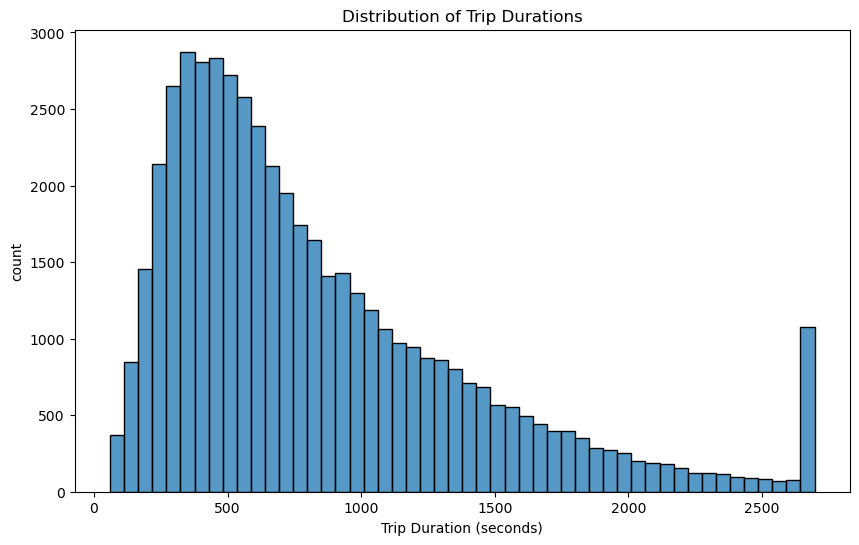

In [119]:
# check the distribution of trip durations
plt.figure(figsize=(10,6))
sns.histplot(df['trip_duration'], bins=50)
plt.title('Distribution of Trip Durations')
plt.xlabel('Trip Duration (seconds)')
plt.ylabel('count')
plt.show()

In [120]:
# check for extreme value in trip durations
df['trip_duration'].describe()

count    49976.000000
mean       838.880243
std        573.681203
min         60.000000
25%        417.000000
50%        672.000000
75%       1112.000000
max       2697.000000
Name: trip_duration, dtype: float64

In [121]:
# look at the distribution of start stations
df['start_station_name'].value_counts().head()

start_station_name
W 20 St & 11 Ave         536
Lafayette St & E 8 St    505
Pershing Square N        503
E 17 St & Broadway       496
West St & Chambers St    465
Name: count, dtype: int64

In [122]:
# look at the distribution of end stations
df['end_station_name'].value_counts().head()

end_station_name
E 17 St & Broadway       571
W 20 St & 11 Ave         525
West St & Chambers St    470
8 Ave & W 31 St          439
Lafayette St & E 8 St    430
Name: count, dtype: int64

# Geospatial analysis, creating a choropleth map using the citibike data

In [124]:
# Step 1:
# create GeoDataFrame for start stations using latitude and longitude
df_points=df.dropna(subset=['start_station_latitude','start_station_longitude']).copy()

In [125]:
# create point geometry( using latitude and longitude order)
df_points['geometry']=df_points.apply(lambda  row: Point(row['start_station_longitude'], row['start_station_latitude']),axis=1)

In [126]:
df_points=gpd.GeoDataFrame(df_points,geometry='geometry',crs='EPSG:4326')

In [127]:
# convert geojson file from dictionary to GeoDataFrame
gdf_geojson=gpd.GeoDataFrame.from_features(data)

In [128]:
# ensure the column is there 
gdf_geojson.geometry.head()

0    MULTIPOLYGON (((-73.89681 40.79581, -73.89797 ...
1    MULTIPOLYGON (((-74.05051 40.56642, -74.04932 ...
2    MULTIPOLYGON (((-73.86706 40.58209, -73.86896 ...
3    MULTIPOLYGON (((-73.83668 40.59495, -73.83599 ...
4    MULTIPOLYGON (((-74.01193 40.68389, -74.01218 ...
Name: geometry, dtype: geometry

In [129]:
gdf_geojson.head()

,geometry,BoroCode,BoroName
0,"MULTIPOLYGON (((-73.89681 40.79581, -73.89797 ...",2,Bronx
1,"MULTIPOLYGON (((-74.05051 40.56642, -74.04932 ...",5,Staten Island
2,"MULTIPOLYGON (((-73.86706 40.58209, -73.86896 ...",3,Brooklyn
3,"MULTIPOLYGON (((-73.83668 40.59495, -73.83599 ...",4,Queens
4,"MULTIPOLYGON (((-74.01193 40.68389, -74.01218 ...",1,Manhattan


In [130]:
# ensure that column is there 
df_points.geometry.head()

0    POINT (-73.99138 40.75467)
1    POINT (-74.00247 40.71939)
2    POINT (-73.99126 40.76019)
3    POINT (-73.97435 40.74316)
4    POINT (-73.99481 40.75045)
Name: geometry, dtype: geometry

In [131]:
# Step 2: Re project points to match crs
df_points=df_points.to_crs(epsg=4326)

In [132]:
# Assign the correct crs for gdf_geojson
gdf_geojson.set_crs(epsg=4326,inplace=True)

,geometry,BoroCode,BoroName
0,"MULTIPOLYGON (((-73.89681 40.79581, -73.89797 ...",2,Bronx
1,"MULTIPOLYGON (((-74.05051 40.56642, -74.04932 ...",5,Staten Island
2,"MULTIPOLYGON (((-73.86706 40.58209, -73.86896 ...",3,Brooklyn
3,"MULTIPOLYGON (((-73.83668 40.59495, -73.83599 ...",4,Queens
4,"MULTIPOLYGON (((-74.01193 40.68389, -74.01218 ...",1,Manhattan


In [133]:
# Step 3:  Spatial join  
joined_gdf= gpd.sjoin(df_points, gdf_geojson,predicate="intersects")

In [134]:
joined_gdf.head()

,trip_id,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,...,trip_duration,subscriber,birth_year,gender,age,gender_desc,geometry,index_right,BoroCode,BoroName
0,LnQzQk,16013,Mon,18,<function to_datetime at 0x000001E777F32FC0>,523,W 38 St & 8 Ave,40.754666,-73.991382,<function to_datetime at 0x000001E777F32FC0>,...,993,Subscriber,1968.0,2,50.0,Female,POINT (-73.99138 40.75467),4,1,Manhattan
1,IL9boN,15230,Thu,18,<function to_datetime at 0x000001E777F32FC0>,257,Lispenard St & Broadway,40.719392,-74.002472,<function to_datetime at 0x000001E777F32FC0>,...,581,Subscriber,1983.0,1,35.0,Male,POINT (-74.00247 40.71939),4,1,Manhattan
2,46clGB,17942,Wed,19,<function to_datetime at 0x000001E777F32FC0>,479,9 Ave & W 45 St,40.760193,-73.991255,<function to_datetime at 0x000001E777F32FC0>,...,361,Subscriber,1989.0,1,29.0,Male,POINT (-73.99126 40.76019),4,1,Manhattan
3,v7vdFt,19683,Sat,11,<function to_datetime at 0x000001E777F32FC0>,527,E 33 St & 1 Ave,40.743156,-73.974347,<function to_datetime at 0x000001E777F32FC0>,...,561,Subscriber,1988.0,2,30.0,Female,POINT (-73.97435 40.74316),4,1,Manhattan
4,VGBsb5,18024,Sat,18,<function to_datetime at 0x000001E777F32FC0>,521,8 Ave & W 31 St,40.750450,-73.994811,<function to_datetime at 0x000001E777F32FC0>,...,2296,Non-Subscriber,NaN,0,NaN,Unknown,POINT (-73.99481 40.75045),4,1,Manhattan


In [135]:
# Step 4: clean the data , if necessary filter out the extreme  trip_duration values ( will use trips between 60 seconds and 3000 seconds , these cutoff might filter extreme values)
joined_clean=joined_gdf[(joined_gdf['trip_duration']>=60) & (joined_gdf['trip_duration']<=3000)]

In [136]:
joined_clean

,trip_id,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,...,trip_duration,subscriber,birth_year,gender,age,gender_desc,geometry,index_right,BoroCode,BoroName
0,LnQzQk,16013,Mon,18,<function to_datetime at 0x000001E777F32FC0>,523,W 38 St & 8 Ave,40.754666,-73.991382,<function to_datetime at 0x000001E777F32FC0>,...,993,Subscriber,1968.0,2,50.0,Female,POINT (-73.99138 40.75467),4,1,Manhattan
1,IL9boN,15230,Thu,18,<function to_datetime at 0x000001E777F32FC0>,257,Lispenard St & Broadway,40.719392,-74.002472,<function to_datetime at 0x000001E777F32FC0>,...,581,Subscriber,1983.0,1,35.0,Male,POINT (-74.00247 40.71939),4,1,Manhattan
2,46clGB,17942,Wed,19,<function to_datetime at 0x000001E777F32FC0>,479,9 Ave & W 45 St,40.760193,-73.991255,<function to_datetime at 0x000001E777F32FC0>,...,361,Subscriber,1989.0,1,29.0,Male,POINT (-73.99126 40.76019),4,1,Manhattan
3,v7vdFt,19683,Sat,11,<function to_datetime at 0x000001E777F32FC0>,527,E 33 St & 1 Ave,40.743156,-73.974347,<function to_datetime at 0x000001E777F32FC0>,...,561,Subscriber,1988.0,2,30.0,Female,POINT (-73.97435 40.74316),4,1,Manhattan
4,VGBsb5,18024,Sat,18,<function to_datetime at 0x000001E777F32FC0>,521,8 Ave & W 31 St,40.750450,-73.994811,<function to_datetime at 0x000001E777F32FC0>,...,2296,Non-Subscriber,NaN,0,NaN,Unknown,POINT (-73.99481 40.75045),4,1,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49971,Fb2bmC,17988,Sat,18,<function to_datetime at 0x000001E777F32FC0>,479,9 Ave & W 45 St,40.760193,-73.991255,<function to_datetime at 0x000001E777F32FC0>,...,2697,Non-Subscriber,NaN,0,NaN,Unknown,POINT (-73.99126 40.76019),4,1,Manhattan
49972,XGB7JU,18458,Sat,17,<function to_datetime at 0x000001E777F32FC0>,261,Johnson St & Gold St,40.694749,-73.983625,<function to_datetime at 0x000001E777F32FC0>,...,1191,Subscriber,1970.0,2,48.0,Female,POINT (-73.98362 40.69475),2,3,Brooklyn
49973,vFs2HS,15054,Sat,18,<function to_datetime at 0x000001E777F32FC0>,402,Broadway & E 22 St,40.740343,-73.989551,<function to_datetime at 0x000001E777F32FC0>,...,1050,Subscriber,1961.0,2,57.0,Female,POINT (-73.98955 40.74034),4,1,Manhattan
49974,xxacSt,16763,Sat,13,<function to_datetime at 0x000001E777F32FC0>,271,Ashland Pl & Hanson Pl,40.685282,-73.978058,<function to_datetime at 0x000001E777F32FC0>,...,2697,Non-Subscriber,NaN,0,NaN,Unknown,POINT (-73.97806 40.68528),2,3,Brooklyn


In [137]:
# Step 5: Aggregate data by borough,calculate the average trip duration per borough
borough_stats=joined_clean.groupby('BoroName').agg(avg_trip_duration=('trip_duration','mean'),count_trips=('trip_duration','count')).reset_index()

In [138]:
borough_stats.head()

,BoroName,avg_trip_duration,count_trips
0,Brooklyn,929.659020,4185
1,Manhattan,829.272136,45650


In [139]:
# Merge the borough statistices back to the geodataframe for mapping
df_merged=gdf_geojson.merge(borough_stats,left_on='BoroName',right_on='BoroName',how='left')

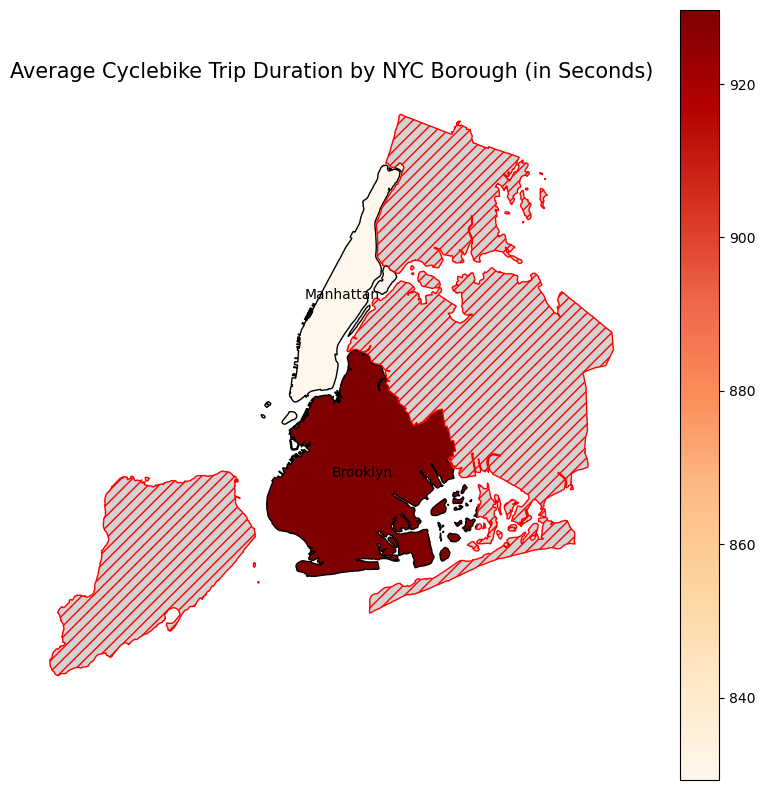

In [140]:
# Step 6. Create choropleth map using average trip duration by borough
fig,ax=plt.subplots(1,1,figsize=(10,10))
df_merged.plot(column='avg_trip_duration',ax=ax,legend=True,cmap='OrRd',edgecolor='black',missing_kwds={"color":"lightgrey","edgecolor":"red","hatch":"///","label":"Missing Values"})
ax.set_title('Average Cyclebike Trip Duration by NYC Borough (in Seconds)',fontsize=15)
ax.set_axis_off()
# Add borough names on the map
for idx, row in df_merged.iterrows():
    if pd.notnull(row['avg_trip_duration']):
        centroid=row['geometry'].centroid
        plt.annotate(row['BoroName'],xy=(centroid.x,centroid.y), horizontalalignment='center',fontsize=10)

plt.show()

# Observation: 
The choropleth map shows the average trip duration for citibike users  by NYC borough. Here's what we can observe:
1. Manhattan appears to have the shortest average trip durations, likely due to the high dencity of Citibike stations in this borough.
2. Brooklyn shows longer average trip durations, which might indecate greater distances between stations or different usage patterns. 
3. The Bronx and Queens have limited or no data in this sample, suggesting lower Citibike coverage in these areas.

# Discussion of Results
This analysis helps answer several research questions:
1. Spatial distribution of Citibike usage: The map clearly shows that Citibike usage is concentrated in Manhattan and part of Brooklyn,with limited coverage in other boroughs.
2. Trip duration patterns: The variation in trip durations between boroughs suggests different usage patterns. Manhattan's shorter trips align with its dense urban grid and high station density.

# New research questions
1. What factors influence the difference in trip durations between Manhattan and Brooklyn?
2. How does station density correlate with average trip duration?
3. What socioeconomic or infrastructure factors might explain the limited Citibike coverage in the Bronx and queens?
4. How do trip patterns vary by time of day or day of week across different boroughs?
5. Would expanding the Citibike netrwork to understand boroughs change overall usage patterns?